# Some examples of data analysis using deep learning method

### 1. Regressing (회기분석)

- 가장 일반적으로 많이 하는 방식이다.
    - 그리고 직관적으로 이해하기 쉬운 방식이다.
    - 그래서 그런가 이걸 왜 굳이 딥러닝으로 해야하는지는 의문이 들때가 있다.

- 딥러닝을 이용한 회귀 분석은 복잡한 비선형 관계를 모델링하는 데 사용하는 강력한 방법이다.
    - 전통적인 통계 회귀 모델(예: 선형 회귀)이 데이터의 단순한 선형 관계를 가정하는 반면, 딥러닝은 여러 층의 뉴런을 통해 데이터의 복잡한 패턴과 상호작용을 학습한다.

- 기본 개념
    - 입력층 (Input Layer): 모델에 데이터를 입력하는 첫 번째 층이다. 피처(독립 변수) 수에 맞게 뉴런 수를 설정한다. 
        - 예를 들어, 3개의 독립 변수가 있다면 입력층의 뉴런 수는 3개다.
    - 은닉층 (Hidden Layers): 입력층과 출력층 사이에 위치하는 하나 이상의 층이다. 이 층들은 데이터의 복잡한 패턴을 학습하며, 각 층의 뉴런은 **activation function** (활성화함수)를 통해 비선형성을 반영한다.
        - 이를 통해 모델은 단순한 선형 관계를 넘어서는 복잡한 데이터 구조를 머리(Neural network)속에 그릴 수 있다. 💡
    - 출력층 (Output Layer): 최종 예측값을 생성하는 층이다. 회귀 분석은 단일 연속형 값을 예측하므로, 출력층은 보통 단일 뉴런으로 구성한다.
        - 이 뉴런은 활성화 함수가 없는 경우가 많으며, 이는 값의 범위를 제한하지 않고 연속적인 값을 직접 출력하기 위함이다. (뭐 그런게 있다. 너무 자세히 알려고는 하지 말자...ㅠㅠ)

- 회귀 분석의 딥러닝 모델 학습 과정
    - 데이터 준비: 모델에 입력될 데이터를 준비한다. 이 과정에서 **Normalization** (정규화)가 중요하다.
        각 피처의 스케일이 다르면 학습이 불안정해지거나 느려질 수 있으므로, 보통 MinMaxScaler와 같은 스케일러를 사용해 모든 데이터의 범위를 동일하게 맞춘다. (대부분 이거 안맞춰서 학습이 엉뚱한 방향으로 폭발(?)해 버린다. 학습을 시작하기 전에는 반드시 방탄복을...)
    - 손실 함수 (Loss Function) 정의: 모델의 예측값과 실제값 사이의 오차를 계산하는 함수다. 회귀 문제에서는 주로 **Mean Squared Error, MSE** (평균제곱오차)를 사용한다.
        - MSE는 예측값과 실제값의 차이를 제곱하여 평균을 내는 방식으로, 오차가 클수록 더 큰 페널티를 부여한다.
    - 최적화 (Optimization): 손실 함수를 최소화하는 방향으로 모델의 가중치(weight)와 편향(bias)을 업데이트하는 과정이다. 경사 하강법(Gradient Descent) 기반의 Adam과 같은 최적화 알고리즘을 널리 사용한다. 
        - 이 알고리즘은 손실 함수의 기울기(gradient)를 계산해, 손실이 가장 빠르게 감소하는 방향으로 모델 파라미터를 조정한다.
    - 학습(Training): 준비된 데이터를 모델에 반복적으로 입력하며 손실을 줄이는 과정을 수행한다. 이 반복 횟수를 **epoch**라고 한다.
        - 모델은 학습 데이터의 패턴을 반복적으로 학습하며 점점 더 정확한 예측을 수행한다.
        - GPU가 있으면 좋은데, 회귀분석에서 GPU가 없어서 못하는 경우는 아직까지..... 쩝.

- 이거다 저거다 말씀마시고... 인천앞바다에 사이다가 떴어도... 실제 예제를 한번 수행해보자.

In [9]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Generate synthetic data
np.random.seed(0)
num_samples = 10000

# x1, x2, x3 inputs
x1 = np.random.rand(num_samples, 1) * 10
x2 = np.random.rand(num_samples, 1) * 5
x3 = np.random.rand(num_samples, 1) * 2 * np.pi

# y output with noise
noise = np.random.randn(num_samples, 1) * 15
y = 5 * x1**2 + 2 * x2 + np.sin(3 * x3) + noise

# Create a DataFrame for convenience
data = pd.DataFrame(np.hstack([x1, x2, x3, y]), columns=['x1', 'x2', 'x3', 'y'])

print(data.head())

         x1        x2        x3           y
0  5.488135  3.741340  2.464095  159.289672
1  7.151894  0.901014  0.258594  282.640248
2  6.027634  1.945116  5.801269  190.478760
3  5.448832  0.188001  2.552450  144.056735
4  4.236548  0.058939  5.933100  100.878714


In [10]:
# Separate features (x) and target (y)
X = data[['x1', 'x2', 'x3']].values
y = data['y'].values.reshape(-1, 1)

# Split the data FIRST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data by fitting scalers on the training data only
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_x.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)

# Transform the test data using the scalers fitted on the training data
X_test_scaled = scaler_x.transform(X_test)
y_test_scaled = scaler_y.transform(y_test)

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_scaled, dtype=torch.float32)

# Define the regression model
class RegressionModel(torch.nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.fc1 = torch.nn.Linear(3, 64)
        self.relu1 = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(64, 32)
        self.relu2 = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear(32, 16)
        self.relu3 = torch.nn.ReLU()
        self.output_layer = torch.nn.Linear(16, 1)

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.relu3(self.fc3(x))
        x = self.output_layer(x)
        return x

# Instantiate the model, loss function, and optimizer
model = RegressionModel()
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
epochs = 50
batch_size = 32

for epoch in range(epochs):
    # Shuffle the training data for each epoch
    indices = torch.randperm(X_train_tensor.size(0))
    X_train_shuffled = X_train_tensor[indices]
    y_train_shuffled = y_train_tensor[indices]

    for i in range(0, len(X_train_shuffled), batch_size):
        # Get a batch of data
        X_batch = X_train_shuffled[i:i+batch_size]
        y_batch = y_train_shuffled[i:i+batch_size]

        # Forward pass
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    test_pred = model(X_test_tensor)
    test_loss = loss_fn(test_pred, y_test_tensor)
    print(f"\nTest Loss (MSE): {test_loss.item():.4f}")

Epoch [10/50], Loss: 0.0006
Epoch [20/50], Loss: 0.0009
Epoch [30/50], Loss: 0.0008
Epoch [40/50], Loss: 0.0005
Epoch [50/50], Loss: 0.0008

Test Loss (MSE): 0.0007


In [11]:
# Create a new input point
new_x = np.array([[1.5, 3.2, 5.0]])

# Scale the new input
new_x_scaled = scaler_x.transform(new_x)
new_x_tensor = torch.tensor(new_x_scaled, dtype=torch.float32)

# Make the prediction
model.eval()
with torch.no_grad():
    predicted_y_scaled_tensor = model(new_x_tensor)

# Inverse transform the prediction
predicted_y_np = predicted_y_scaled_tensor.numpy()
predicted_y = scaler_y.inverse_transform(predicted_y_np)

print(f"Input x: {new_x}")
print(f"Predicted y: {predicted_y[0][0]:.4f}")

# Compare with the true value
true_y = 5 * 1.5**2 + 2 * 3.2 + np.sin(3 * 5.0)
print(f"True y (without noise): {true_y:.4f}")

Input x: [[1.5 3.2 5. ]]
Predicted y: 13.5185
True y (without noise): 18.3003


In [12]:
def find_x_for_y_pytorch(target_y, model, scaler_x, scaler_y):
    """
    Finds x values that produce a target y value using optimization in PyTorch.
    """
    # Scale the target y value
    target_y_scaled = scaler_y.transform(np.array([[target_y]]))
    target_y_tensor = torch.tensor(target_y_scaled, dtype=torch.float32)

    # Initialize a PyTorch parameter for x, which will be optimized
    x_initial_guess = torch.nn.Parameter(torch.tensor([[0.5, 0.5, 0.5]], dtype=torch.float32))

    # Define an optimizer for the x parameter
    optimizer = torch.optim.Adam([x_initial_guess], lr=0.01)

    # Run the optimization loop
    for i in range(500):
        # Forward pass
        predicted_y_scaled = model(x_initial_guess)
        
        # Calculate the loss
        loss = loss_fn(predicted_y_scaled, target_y_tensor)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Unscale the optimized x values
    optimized_x = scaler_x.inverse_transform(x_initial_guess.detach().numpy())
    
    return optimized_x

# --- Example of finding x for a target y ---
target_y_value = 150

# Find the x values
optimized_x_values = find_x_for_y_pytorch(target_y_value, model, scaler_x, scaler_y)

print(f"\nTarget y value: {target_y_value}")
print(f"Optimized x values: {optimized_x_values[0]}")

# Verify the result by using the optimized x to predict y
optimized_x_scaled = scaler_x.transform(optimized_x_values)
optimized_x_tensor = torch.tensor(optimized_x_scaled, dtype=torch.float32)

model.eval()
with torch.no_grad():
    predicted_y_from_optimized_x = model(optimized_x_tensor)
    predicted_y_from_optimized_x = scaler_y.inverse_transform(predicted_y_from_optimized_x.numpy())

print(f"Predicted y from optimized x: {predicted_y_from_optimized_x[0][0]:.4f}")


Target y value: 150
Optimized x values: [5.414149  2.7842414 3.4431295]
Predicted y from optimized x: 150.0000


- x 값이 2가지인 경우로 바꿔보자..
    - x1, x2, y 이렇게 세개의 값을 좌표로 하는 3차원 그래프를 그려볼 수 있다.

In [1]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
# --- 1. Data Generation and Plotting ---

def generate_data():
    """Generates synthetic data for regression analysis."""
    np.random.seed(0)
    num_samples = 10000

    # x1, x2 inputs
    x1 = np.random.rand(num_samples, 1) * 10
    x2 = np.random.rand(num_samples, 1) * 5

    # y output with noise
    noise = np.random.randn(num_samples, 1) * 2.0
    y = 5 * np.sin(x1) + 2 * x2**2 + noise

    # Create a DataFrame for convenience
    data = pd.DataFrame(np.hstack([x1, x2, y]), columns=['x1', 'x2', 'y'])
    
    return data

def plot_3d_data(data):
    """Creates a 3D scatter plot of the generated data."""
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    sc = ax.scatter(data['x1'], data['x2'], data['y'], c=data['y'], cmap='viridis', s=10)
    ax.set_title('Generated Data: y vs. x1 and x2')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    fig.colorbar(sc, label='y value')

    plt.tight_layout()
    plt.show()

# --- 2. Building and Training the PyTorch Model ---

# Define the regression model
class RegressionModel(torch.nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.fc1 = torch.nn.Linear(2, 64)
        self.relu1 = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(64, 32)
        self.relu2 = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear(32, 16)
        self.relu3 = torch.nn.ReLU()
        self.output_layer = torch.nn.Linear(16, 1)

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.relu3(self.fc3(x))
        x = self.output_layer(x)
        return x

def train_and_evaluate_model(X_train, y_train, X_test, y_test):
    """Trains and evaluates the PyTorch regression model."""
    # Convert numpy arrays to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

    # Instantiate the model, loss function, and optimizer
    model = RegressionModel()
    loss_fn = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Train the model
    epochs = 50
    batch_size = 32

    for epoch in range(epochs):
        # Shuffle the training data for each epoch
        indices = torch.randperm(X_train_tensor.size(0))
        X_train_shuffled = X_train_tensor[indices]
        y_train_shuffled = y_train_tensor[indices]

        for i in range(0, len(X_train_shuffled), batch_size):
            # Get a batch of data
            X_batch = X_train_shuffled[i:i+batch_size]
            y_batch = y_train_shuffled[i:i+batch_size]

            # Forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

    # Evaluate the model on the test set
    model.eval()
    with torch.no_grad():
        test_pred = model(X_test_tensor)
        test_loss = loss_fn(test_pred, y_test_tensor)
        print(f"\nTest Loss (MSE): {test_loss.item():.4f}")
        
    return model

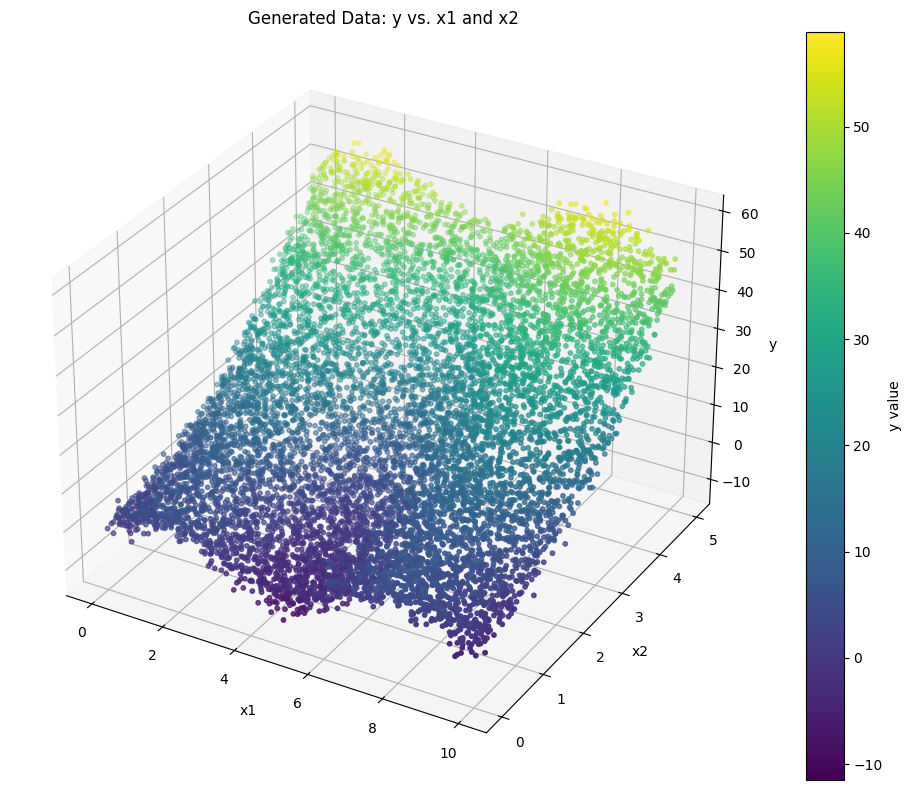

In [4]:
# 1. Generate and plot data
data = generate_data()
plot_3d_data(data)

In [5]:
# --- 3. Making a Prediction ---

def make_prediction(model, scaler_x, scaler_y):
    """Makes a single prediction with the trained model."""
    print("\n--- Making a single prediction ---")
    new_x = np.array([[1.5, 3.2]])
    
    # Scale the new input
    new_x_scaled = scaler_x.transform(new_x)
    new_x_tensor = torch.tensor(new_x_scaled, dtype=torch.float32)

    # Make the prediction
    model.eval()
    with torch.no_grad():
        predicted_y_scaled_tensor = model(new_x_tensor)

    # Inverse transform the prediction
    predicted_y_np = predicted_y_scaled_tensor.numpy()
    predicted_y = scaler_y.inverse_transform(predicted_y_np)

    print(f"Input x: {new_x}")
    print(f"Predicted y: {predicted_y[0][0]:.4f}")

    # Compare with the true value (without noise)
    true_y = 5 * np.sin(new_x[0][0]) + 2 * new_x[0][1]**2
    print(f"True y (without noise): {true_y:.4f}")

# --- 4. Predicting x from y (Inverse Optimization) ---

def find_x_for_y_pytorch(target_y, model, scaler_x, scaler_y):
    """Finds x values that produce a target y using optimization."""
    print(f"\n--- Finding x values for target y: {target_y} ---")
    
    # Scale the target y value
    target_y_scaled = scaler_y.transform(np.array([[target_y]]))
    target_y_tensor = torch.tensor(target_y_scaled, dtype=torch.float32)

    # Initialize a PyTorch parameter for x, which will be optimized
    x_initial_guess = torch.nn.Parameter(torch.tensor([[0.5, 0.5]], dtype=torch.float32))

    # Define an optimizer for the x parameter
    optimizer = torch.optim.Adam([x_initial_guess], lr=0.01)

    # Define a loss function for the optimization process
    loss_fn = torch.nn.MSELoss()

    # Run the optimization loop
    for i in range(500):
        # Forward pass
        predicted_y_scaled = model(x_initial_guess)
        
        # Calculate the loss
        loss = loss_fn(predicted_y_scaled, target_y_tensor)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Unscale the optimized x values
    optimized_x = scaler_x.inverse_transform(x_initial_guess.detach().numpy())
    
    # Verify the result
    optimized_x_scaled = scaler_x.transform(optimized_x)
    optimized_x_tensor = torch.tensor(optimized_x_scaled, dtype=torch.float32)
    model.eval()
    with torch.no_grad():
        predicted_y_from_optimized_x = model(optimized_x_tensor)
        predicted_y_from_optimized_x = scaler_y.inverse_transform(predicted_y_from_optimized_x.numpy())

    print(f"Optimized x values: {optimized_x[0]}")
    print(f"Predicted y from optimized x: {predicted_y_from_optimized_x[0][0]:.4f}")

In [6]:
# Prepare data for model training
X = data[['x1', 'x2']].values
y = data['y'].values.reshape(-1, 1)

# Split the data FIRST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data by fitting scalers on the training data only
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_scaled = scaler_x.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)

# Transform the test data using the scalers fitted on the training data
X_test_scaled = scaler_x.transform(X_test)
y_test_scaled = scaler_y.transform(y_test)

# 2. Train and evaluate the model
model = train_and_evaluate_model(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled)

Epoch [10/50], Loss: 0.0017
Epoch [20/50], Loss: 0.0009
Epoch [30/50], Loss: 0.0009
Epoch [40/50], Loss: 0.0011
Epoch [50/50], Loss: 0.0009

Test Loss (MSE): 0.0010


In [7]:
# 3. Make a single prediction
make_prediction(model, scaler_x, scaler_y)

# 4. Find x for a given y
target_y_value = 50
find_x_for_y_pytorch(target_y_value, model, scaler_x, scaler_y)


--- Making a single prediction ---
Input x: [[1.5 3.2]]
Predicted y: 26.0215
True y (without noise): 25.4675

--- Finding x values for target y: 50 ---
Optimized x values: [7.9958982 4.7003956]
Predicted y from optimized x: 50.0000


- 이제 이 딥(?)러닝 모델에 대해서 살펴보자... (살펴본다고 알수 있을런지는 잘 모르겠으나... 쩝.)

In [ ]:
# Define the regression model
class RegressionModel(torch.nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.fc1 = torch.nn.Linear(2, 64)
        self.relu1 = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(64, 32)
        self.relu2 = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear(32, 16)
        self.relu3 = torch.nn.ReLU()
        self.output_layer = torch.nn.Linear(16, 1)

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.relu3(self.fc3(x))
        x = self.output_layer(x)
        return x

- 이 RegressionModel 클래스를 마치 제품을 만드는 작은 공장이라고 생각해보자. (우리는 공장에 대해서는 잘 알것으로 자주 추정하지 않는가.)
    - fc1, fc2, fc3, output_layer는 제품을 가공하는 작업 기계다. 각각의 기계는 정해진 규칙에 따라 소재를 변형하여 부품이나 모듈로 만드는 것이라고 볼 수 있다. (부품소재사업이구만.)
    - relu1, relu2, relu3는 기계 사이에 있는 특별한 필터와 같다. 이 필터는 음수 값을 모두 0으로 만들어, 모델이 더 복잡한 패턴을 학습할 수 있도록 도와준다. (비선형성을 부여하는 역할, relu = rectified linear unit)
    - 여기서는 x1, x2라는 두 가지 소재(입력값)를 넣어 최종적으로 y라는 하나의 제품(출력값)을 만드는 공장 설계를 마쳤다.

- forward 함수는 제품 생산 과정을 모사한 것이라고 할 수 있다.
    - 이 부분은 실제로 재료를 투입해서 제품이 완성될 때까지의 생산 라인에 해당.
    - x라는 원재료가 들어오면, forward 함수는 이 재료를 fc1 기계에 넣고, relu1 필터를 통과시키는 과정을 반복한다.
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.relu3(self.fc3(x))
    - 마지막으로 output_layer 기계를 거치면, 최종 제품인 y 예측값이 나오게 된다.
        x = self.output_layer(x)
    - 이 최종 결과물 x를 반환(return)하는 것으로 생산이 끝난다.

- 결론적으로, 이 코드는 두 개의 입력값을 받아 여러 층의 가공 과정을 거쳐 최종적으로 하나의 출력값을 예측하는 신경망 모델의 설계도를 정의하고, 그 생산 과정을 순서대로 짜놓은 것이다.

- 암튼 뭐 그렇다치고... 

In [8]:
def plot_3d_predictions(model, scaler_x, scaler_y):
    """
    Generates and plots the 3D surface of the model's predictions.
    This shows the learned function approximation.
    """
    print("\n--- Plotting 3D predictions ---")
    # Create a grid of x1 and x2 values
    x1_range = np.linspace(0, 10, 100)
    x2_range = np.linspace(0, 5, 100)
    x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
    
    # Flatten the grids and combine into a single array
    grid_data = np.vstack([x1_grid.ravel(), x2_grid.ravel()]).T

    # Scale the grid data using the same scaler from training
    grid_data_scaled = scaler_x.transform(grid_data)
    grid_data_tensor = torch.tensor(grid_data_scaled, dtype=torch.float32)

    # Get predictions from the trained model
    model.eval()
    with torch.no_grad():
        y_pred_scaled_tensor = model(grid_data_tensor)

    # Inverse transform the predictions to the original scale
    y_pred_np = y_pred_scaled_tensor.numpy()
    y_pred = scaler_y.inverse_transform(y_pred_np)
    
    # Reshape the predictions back into a grid for plotting
    y_pred_grid = y_pred.reshape(x1_grid.shape)

    # Create the 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x1_grid, x2_grid, y_pred_grid, cmap='viridis', alpha=0.8)
    
    ax.set_title("Model's Learned Function Approximation")
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('Predicted y')
    plt.tight_layout()
    plt.show()


--- Plotting 3D predictions ---


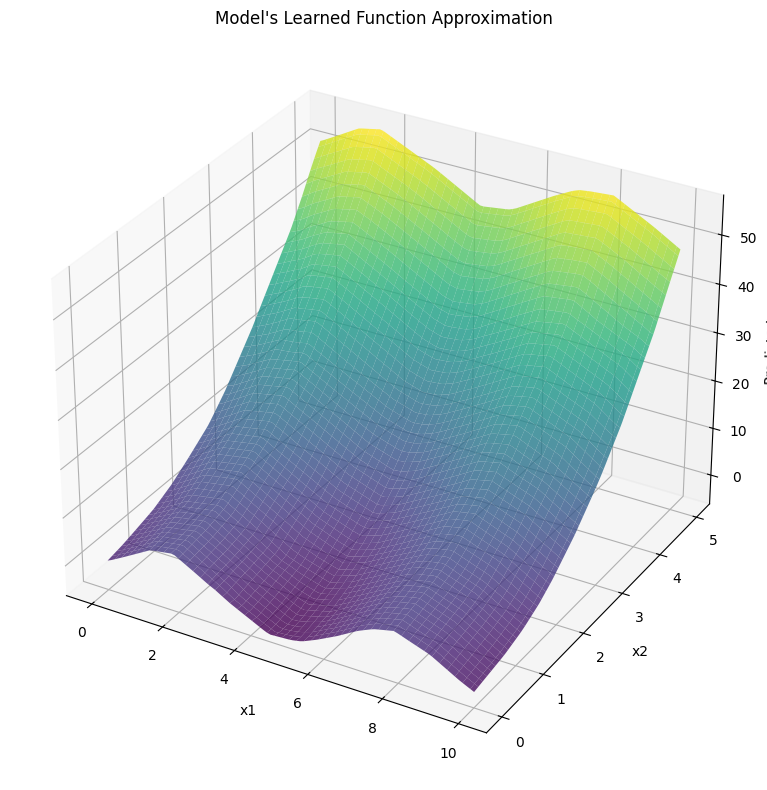

In [9]:
# 5. Plot the model's learned function
plot_3d_predictions(model, scaler_x, scaler_y)

- 암튼 회기분석은 왠지 딥러닝을 하는 것 같지 않은 그런 그... 느낌적인 느낌이랄까...
    - 그래 좋아... 그럼 뭐 좀더 복잡한 거에 도전하지 뭐... 도오저언!!!

### 2. 시계열 데이터의 분석 그리고 미래예측

- 예제 1

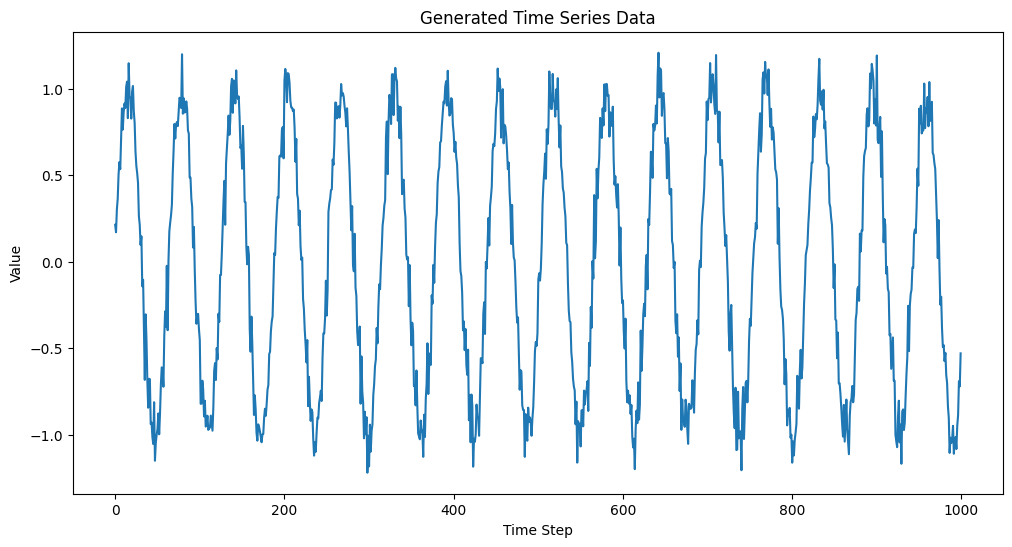

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# 시계열 데이터 생성
# 사인파 + 약간의 노이즈
time = np.arange(0, 100, 0.1)
data = np.sin(time) + np.random.normal(0, 0.1, len(time))

plt.figure(figsize=(12, 6))
plt.plot(data)
plt.title("Generated Time Series Data")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.show()

Epoch [20/200], Loss: 0.0136
Epoch [40/200], Loss: 0.0135
Epoch [60/200], Loss: 0.0190
Epoch [80/200], Loss: 0.0152
Epoch [100/200], Loss: 0.0163
Epoch [120/200], Loss: 0.0154
Epoch [140/200], Loss: 0.0148
Epoch [160/200], Loss: 0.0152
Epoch [180/200], Loss: 0.0136
Epoch [200/200], Loss: 0.0105


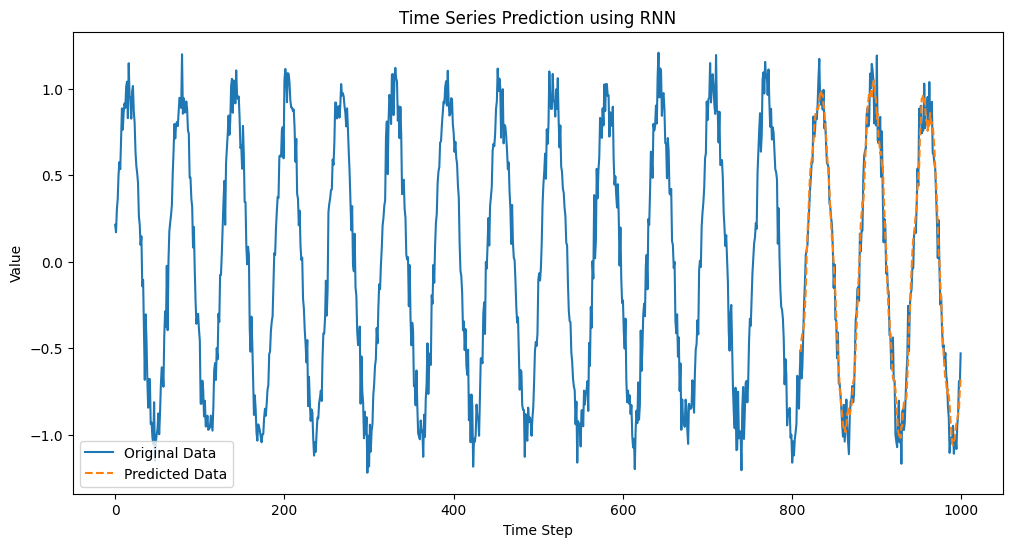

In [8]:

# 1. 데이터 전처리
sequence_length = 10
train_data_size = int(len(data) * 0.8)

X = []
y = []
for i in range(len(data) - sequence_length):
    X.append(data[i:i + sequence_length])
    y.append(data[i + sequence_length])

X = np.array(X)
y = np.array(y)

X_train = torch.FloatTensor(X[:train_data_size]).unsqueeze(-1)
y_train = torch.FloatTensor(y[:train_data_size]).unsqueeze(-1)
X_test = torch.FloatTensor(X[train_data_size:]).unsqueeze(-1)
y_test = torch.FloatTensor(y[train_data_size:]).unsqueeze(-1)

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# 2. RNN 모델 구축
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

input_size = 1
hidden_size = 50
output_size = 1
model = SimpleRNN(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 3. 모델 학습
epochs = 200
for epoch in range(epochs):
    for inputs, targets in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 20 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

# 4. 미래 예측 및 시각화
model.eval()
with torch.no_grad():
    predictions = model(X_test)

# predictions를 1차원 numpy 배열로 변환
predictions_1d = predictions.squeeze().numpy()

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(data)), data, label="Original Data")
plt.plot(np.arange(train_data_size + sequence_length, len(data)), predictions_1d, label="Predicted Data", linestyle='--')
plt.title("Time Series Prediction using RNN")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.show()

- 엇!! 그렇다면 이거...

    <img src="images/image_suspicous.png" width="200"><br>

- 이른바, LSTM(Long Short-Term Memory)
    - 장기 기억력을 가진 인공 신경망. 
    - 기존 RNN(Recurrent Neural Network)의 한계를 극복하기 위해
    - RNN은 시계열 데이터의 장기적인 패턴을 학습하는 데 어려움이 있는데, 이 문제를 해결하기 위해 '**Gate(게이트)**'라는 특별한 구조를 도입.

- 🧠 기억을 조절하는 세 개의 게이트
    - LSTM은 마치 뇌처럼 정보를 기억하거나 잊고, 새로운 정보를 업데이트하는 과정을 세 개의 '게이트'를 통해 조절한다. 
    - 이 게이트들은 각각의 역할을 담당하는 작은 신경망이라고 생각하면 된다.
        - 망각 게이트 (Forget Gate) 🚪: 이 게이트는 **What to throw away**(무엇을 잊어야 하나)?를 결정. 과거의 기억 중에서 현재 시점의 정보를 예측하는 데 불필요한 정보(예: 문맥상 중요하지 않은 단어)는 지워버립니다.
        - 입력 게이트 (Input Gate) 📥: 이 게이트는 **Waht to store**(무엇을 기억해야하나)?"를 결정. 현재 입력된 정보 중에서 중요하다고 판단되는 새로운 정보를 기억에 추가할지 판단한다.
        - 출력 게이트 (Output Gate) 📤: 이 게이트는 **What to ouput forward**(무엇을 내보낼까)?"를 결정. 현재의 기억 상태(셀 상태)를 바탕으로 다음 단계로 전달할 정보와 현재 시점의 예측값을 결정한다.
    - 이 세 게이트가 협력하여 작동함으로써, LSTM은 RNN이 놓쳤던 장기적인 의존성을 학습하고 예측 성능을 크게 향상시킬 수 있다. 주식 시장 예측, 자연어 처리(번역, 챗봇), 음성 인식 등 시간에 따라 변화하는 데이터를 다루는 데 매우 효과적이라고 주장하나, 주식 시장은... 글쎄나...

        <img src="images/image_025.png"><br>

In [ ]:
!pip install yfinance
!pip install torch
!pip install numpy
!pip install matplotlib

In [10]:
import yfinance as yf
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 1. 주식 데이터 다운로드
ticker = 'AAPL'
data = yf.download(ticker, start='2020-01-01', end='2024-01-01')
close_prices = data['Close'].values.reshape(-1, 1)

# 2. 데이터 정규화 (Normalization)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# 3. 시퀀스 데이터셋 생성
sequence_length = 60 # 60일치 과거 데이터로 다음 날 예측
X = []
y = []
for i in range(len(scaled_data) - sequence_length):
    X.append(scaled_data[i:i + sequence_length])
    y.append(scaled_data[i + sequence_length])

X = np.array(X)
y = np.array(y)

# 4. 훈련 및 테스트 데이터 분리
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 5. Pytorch 텐서로 변환
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

C:\Users\greathtj\AppData\Local\Temp\ipykernel_29636\3741737963.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2020-01-01', end='2024-01-01')
[*********************100%***********************]  1 of 1 completed


In [11]:
# 1. LSTM 모델 정의
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# 2. 모델 인스턴스화, 손실 함수 및 최적화기 설정
input_size = 1
hidden_size = 50
num_layers = 2
output_size = 1
model = LSTMModel(input_size, hidden_size, num_layers, output_size)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 3. 모델 학습
epochs = 100
for epoch in range(epochs):
    for inputs, targets in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.0027
Epoch [20/100], Loss: 0.0015
Epoch [30/100], Loss: 0.0012
Epoch [40/100], Loss: 0.0011
Epoch [50/100], Loss: 0.0007
Epoch [60/100], Loss: 0.0006
Epoch [70/100], Loss: 0.0008
Epoch [80/100], Loss: 0.0009
Epoch [90/100], Loss: 0.0006
Epoch [100/100], Loss: 0.0008


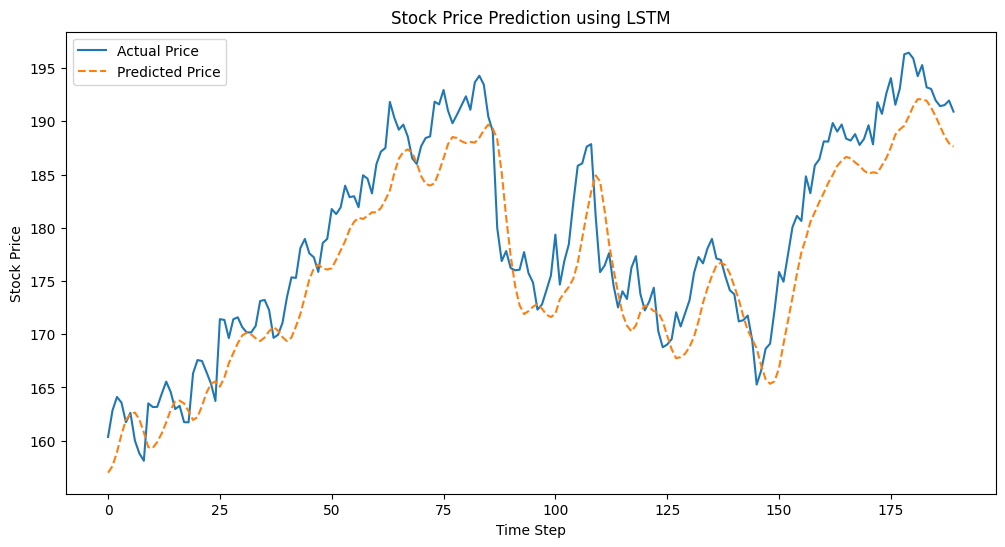

In [12]:
# 1. 예측
model.eval()
with torch.no_grad():
    test_predictions = model(X_test)

# 2. 정규화된 값을 원래 스케일로 되돌리기
test_predictions_original = scaler.inverse_transform(test_predictions.numpy())
y_test_original = scaler.inverse_transform(y_test.numpy())

# 3. 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Actual Price')
plt.plot(test_predictions_original, label='Predicted Price', linestyle='--')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time Step')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

- 은행 대출이라도 받아야하나....
    - 그러나, 그래프를 자세히 들여다보면.... 쩝.

        <img src="images/image_disappointed.png" width="200"><br>

- 뭐 어떻든, 이번에는 우리가 가진 데이터를 적용해서 한번 해볼까???

In [11]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [12]:
# 1. 데이터 로드 및 전처리
try:
    # 'data.csv' 파일을 pandas를 이용해 불러옵니다.
    df = pd.read_csv('data/hourly_stats.csv')
    print("CSV 파일 로드 완료. 데이터 정보:")
    print(df.head())
except FileNotFoundError:
    print("Error: 'data.csv' 파일을 찾을 수 없습니다. 파일 경로를 확인해주세요.")
    exit()

# '_time' 컬럼을 x축 데이터로 사용하기 위해 날짜/시간 형식으로 변환합니다.
# format 인자를 제거하여 pandas가 자동으로 날짜 형식을 감지하도록 합니다.
df['_time'] = pd.to_datetime(df['_time'], errors='coerce')
# 'errors=coerce'는 변환 실패 시 NaT(Not a Time)로 만듭니다.
df = df.dropna(subset=['_time']) # 변환 실패한 행 제거

# 데이터가 비어있는지 확인
if df.empty:
    print("Error: 날짜/시간 형식 변환 후 데이터가 모두 제거되었습니다. '_time' 컬럼의 형식을 확인해주세요.")
    exit()

# 'x' 컬럼을 시계열 데이터로 사용합니다.
data_series = df['x'].values.reshape(-1, 1)

# 데이터 정규화 (Normalization)
# LSTM 모델의 학습 효율을 높이기 위해 데이터를 0과 1 사이로 정규화합니다.
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_series)

# 시퀀스 데이터셋 생성
# 과거 데이터를 'look-back' 기간만큼 묶어서 입력(X)으로, 다음 값을 정답(y)으로 설정합니다.
sequence_length = 5  # 과거 5개의 데이터로 다음 값 예측
X = []
y = []
for i in range(len(scaled_data) - sequence_length):
    X.append(scaled_data[i:i + sequence_length])
    y.append(scaled_data[i + sequence_length])

X = np.array(X)
y = np.array(y)

# 훈련 및 테스트 데이터 분리 (80% 훈련, 20% 테스트)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Pytorch 텐서로 변환
X_train_t = torch.FloatTensor(X_train)
y_train_t = torch.FloatTensor(y_train)
X_test_t = torch.FloatTensor(X_test)
y_test_t = torch.FloatTensor(y_test)

train_dataset = TensorDataset(X_train_t, y_train_t)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=False)

CSV 파일 로드 완료. 데이터 정보:
                       _time  Unnamed: 0  result  table          x          y  \
0  2023-05-16 07:00:00+00:00         NaN     NaN    0.0  41.782283 -31.493484   
1  2023-05-16 08:00:00+00:00         NaN     NaN    0.0  42.432778 -31.245865   
2  2023-05-16 09:00:00+00:00         NaN     NaN    0.0  43.456263 -29.917280   
3  2023-05-16 10:00:00+00:00         NaN     NaN    0.0  42.504877 -30.788635   
4  2023-05-16 11:00:00+00:00         NaN     NaN    0.0  44.910559 -28.336414   

             z  
0  4134.264672  
1  4133.883599  
2  4132.937578  
3  4133.237726  
4  4132.920308  


In [13]:
# 2. LSTM 모델 구축
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

input_size = 1
hidden_size = 50
num_layers = 2
output_size = 1
model = LSTMModel(input_size, hidden_size, num_layers, output_size)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [14]:
# 3. 모델 학습
epochs = 200
for epoch in range(epochs):
    for inputs, targets in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    if (epoch + 1) % 20 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [20/200], Loss: 0.0015
Epoch [40/200], Loss: 0.0015
Epoch [60/200], Loss: 0.0014
Epoch [80/200], Loss: 0.0013
Epoch [100/200], Loss: 0.0013
Epoch [120/200], Loss: 0.0013
Epoch [140/200], Loss: 0.0012
Epoch [160/200], Loss: 0.0012
Epoch [180/200], Loss: 0.0012
Epoch [200/200], Loss: 0.0012


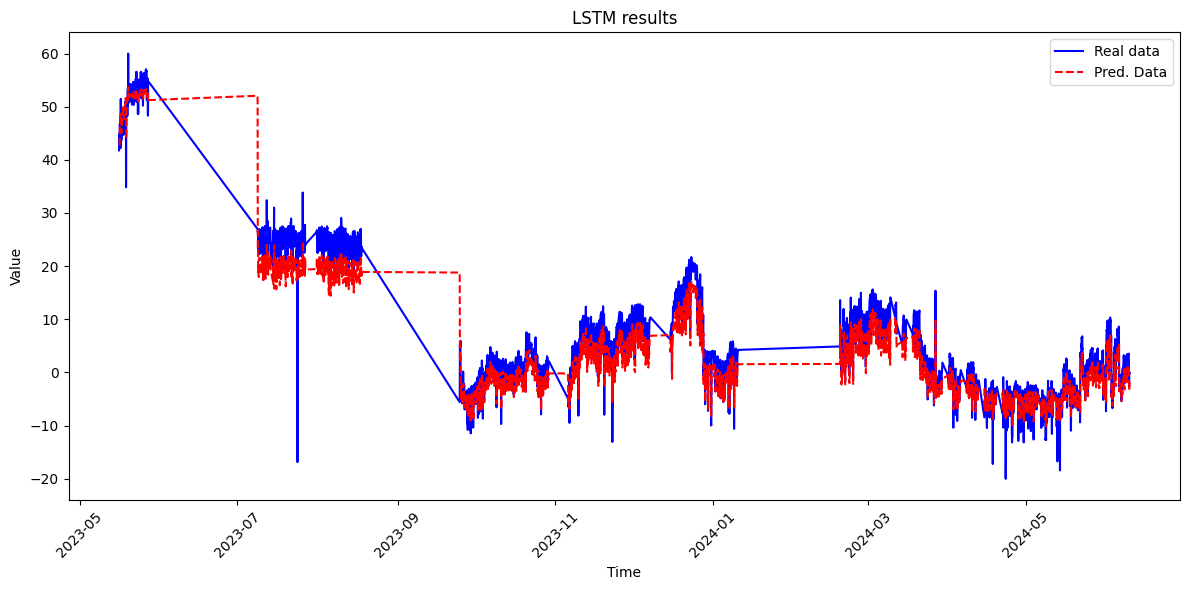

다음 날 예측 값: -1.9971


In [15]:
# 4. 예측 및 시각화
model.eval()
with torch.no_grad():
    # 전체 데이터셋을 사용한 예측
    full_data_predictions = model(torch.FloatTensor(X))

# 정규화된 값을 원래 스케일로 되돌리기
# .detach()를 추가하여 그래디언트 계산 그래프에서 분리
full_predictions_original = scaler.inverse_transform(full_data_predictions.detach().numpy())
test_predictions_original = scaler.inverse_transform(model(X_test_t).detach().numpy())

# 시각화를 위한 전체 데이터 및 예측값 준비
combined_predictions = np.full_like(data_series, np.nan)
combined_predictions[sequence_length:] = full_predictions_original

# 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(df['_time'], data_series, label='Real data', color='blue')
plt.plot(df['_time'][sequence_length:], combined_predictions[sequence_length:], label='Pred. Data', color='red', linestyle='--')
plt.title('LSTM results')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 마지막 값 예측
last_sequence = scaled_data[-sequence_length:].reshape(1, sequence_length, 1)
last_sequence_t = torch.FloatTensor(last_sequence)
with torch.no_grad():
    future_prediction_scaled = model(last_sequence_t)

future_prediction_original = scaler.inverse_transform(future_prediction_scaled.numpy())
print(f"다음 날 예측 값: {future_prediction_original[0][0]:.4f}")